In [153]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [193]:
from sklearn.datasets import load_iris
from ml_tooling import ModelData
from ml_tooling.baseclass import logger
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [179]:
class IrisModel(ModelData):
    def get_training_data(self):
        data = load_iris()
        return pd.DataFrame(data=data.data, columns=data.feature_names), np.where(data.target == 1, 1, 0)
    
    def get_prediction_data(self, idx):
        X, y = self.get_training_data()
        
        return X.loc[idx, :].to_frame().T
    
    def setup_estimator(self):
        RandomForestClassifier(n_estimators=100, max_depth=100)

In [180]:
rf_clf = IrisModel(RandomForestClassifier(n_estimators=10))

In [194]:
lr = IrisModel(LogisticRegression())

In [195]:
lr.score_estimator()

[14:19:37] - Scoring estimator...
/home/anders/miniconda3/envs/ml_tooling/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
[14:19:37] - LogisticRegression - accuracy: 0.631578947368421


<Result LogisticRegression: accuracy: 0.63 >

In [181]:
rf_clf.config.RANDOM_STATE = 42

In [158]:
rf_clf.config

<Config: 
VERBOSITY: 0
CLASSIFIER_METRIC: accuracy
REGRESSION_METRIC: r2
CROSS_VALIDATION: 10
STYLE_SHEET: /home/anders/Projects/ml_tooling/src/ml_tooling/almbrand.mplstyle
N_JOBS: -1
TEST_SIZE: 0.25
RANDOM_STATE: 42
RUN_DIR: /home/anders/Projects/ml_tooling/notebooks/runs
MODEL_DIR: /home/anders/Projects/ml_tooling/notebooks/models
LOG: False
>

In [182]:
result = rf_clf.score_estimator(metric='roc_auc', cv=10)

[14:11:51] - Scoring estimator...
[14:11:51] - Cross-validating...
[14:11:53] - RandomForestClassifier - roc_auc: 0.978125


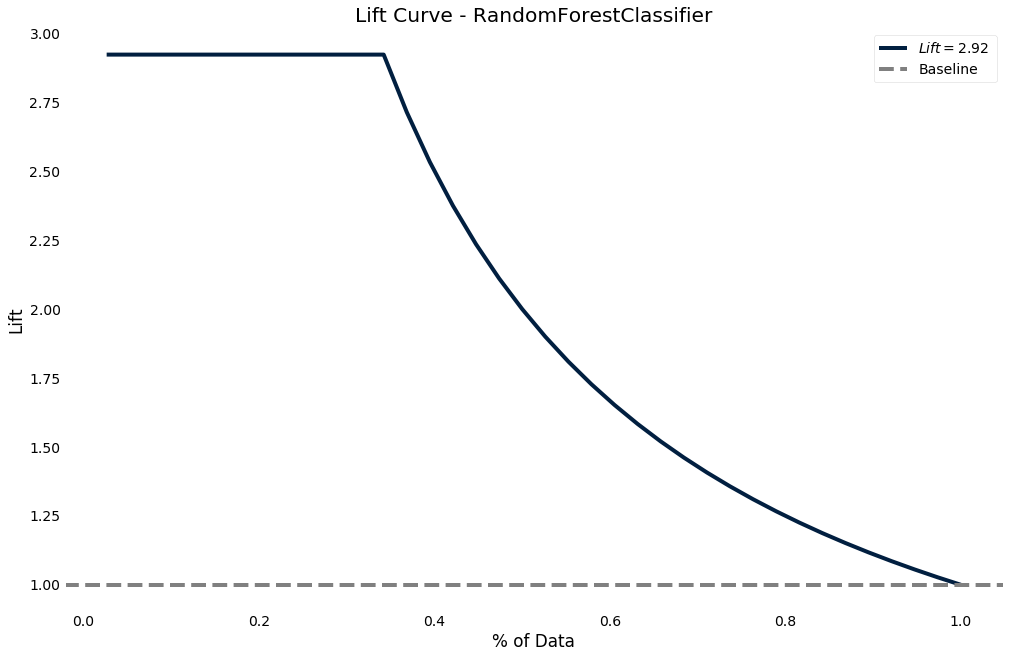

In [185]:
result.plot.lift_curve()

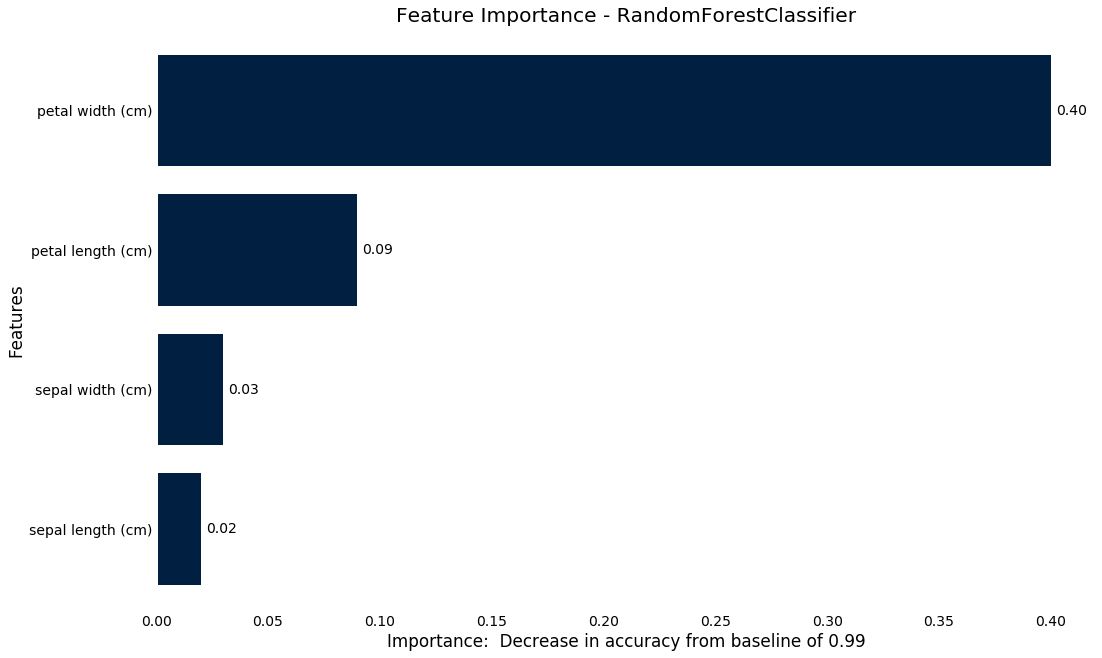

In [186]:
ax = result.plot.feature_importance(100)

In [187]:
with rf_clf.log('./gridsearch'):
    best_model, results = rf_clf.gridsearch({"max_depth": [5, 10, 15]})

[14:15:30] - Starting gridsearch...
[14:15:32] - Done!
[14:15:32] - Saved run info at None


In [188]:
best_model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [192]:
results.to_dataframe()

,bootstrap,class_weight,criterion,max_depth,max_features,max_leaf_nodes,metric,min_impurity_decrease,min_impurity_split,min_samples_leaf,...,min_weight_fraction_leaf,n_estimators,n_jobs,oob_score,random_state,score,verbose,warm_start,cross_val_std,cv
0,True,None,gini,15,auto,None,accuracy,0.0,None,1,...,0.0,10,None,False,None,0.955000,0,False,0.058713,10
1,True,None,gini,15,auto,None,accuracy,0.0,None,1,...,0.0,10,None,False,None,0.947576,0,False,0.056963,10
2,True,None,gini,15,auto,None,accuracy,0.0,None,1,...,0.0,10,None,False,None,0.945909,0,False,0.058076,10


In [196]:
with rf_clf.log('./test'):
    rf_clf.score_estimator()

[14:19:51] - Scoring estimator...
[14:19:51] - RandomForestClassifier - accuracy: 0.9473684210526315
[14:19:51] - Saved run info at /home/anders/Projects/ml_tooling/notebooks/runs/test/20190325/RandomForestClassifier_accuracy_0.947_1419.yaml


In [197]:
with rf_clf.log('./save'):
    rf_clf.save_estimator()

[14:20:34] - Saved estimator to /home/anders/Projects/ml_tooling/notebooks/models/IrisModel_RandomForestClassifier_4a58884f5ead833f515d724517f89c27747797c8.pkl


In [198]:
test_clf = IrisModel.load_estimator()

[14:20:53] - Loaded RandomForestClassifier for IrisModel


In [199]:
test_clf.estimator

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [200]:
test_clf.make_prpediction(19, proba=True)

,0,1
0,1.0,0.0


In [169]:
from sklearn.dummy import DummyClassifier

In [201]:
best_model, results = IrisModel.test_models([RandomForestClassifier(n_estimators=10), LogisticRegression(), DummyClassifier()], log_dir='')

[14:21:27] - Training estimator 1/3: RandomForestClassifier
[14:21:27] - Scoring estimator...
[14:21:27] - RandomForestClassifier - accuracy: 0.9736842105263158
[14:21:27] - Training estimator 2/3: LogisticRegression
[14:21:27] - Scoring estimator...
/home/anders/miniconda3/envs/ml_tooling/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
[14:21:27] - LogisticRegression - accuracy: 0.631578947368421
[14:21:27] - Training estimator 3/3: DummyClassifier
[14:21:27] - Scoring estimator...
[14:21:27] - DummyClassifier - accuracy: 0.5789473684210527
[14:21:27] - Best estimator: RandomForestClassifier - accuracy: 0.9736842105263158


In [202]:
results

[<Result RandomForestClassifier: accuracy: 0.97 >
<Result LogisticRegression: accuracy: 0.63 >
<Result DummyClassifier: accuracy: 0.58 >]